In [1]:
# Importing Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading Images
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvary = cv2.imread('../DATA/solvay_conference.jpg',0)

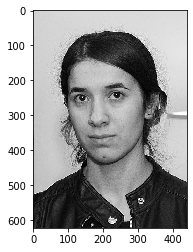

In [5]:
plt.imshow(nadia,cmap='gray')

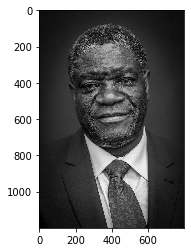

In [6]:
plt.imshow(denis,cmap='gray')

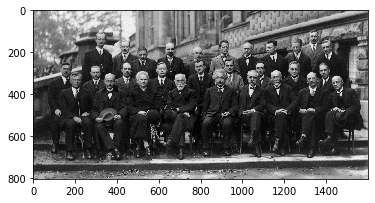

In [7]:
plt.imshow(solvary,cmap='gray')

In [8]:
# Loading cascades
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [21]:
# Function to detect face in a image using harcascades
def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y),(x+w, y+h),(255,255,255),5)
        
    return face_img

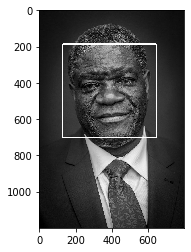

In [22]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

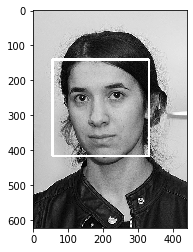

In [23]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

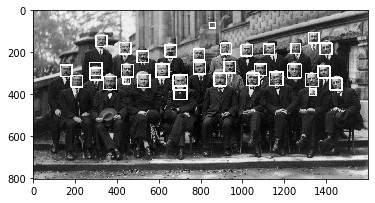

In [24]:
result = detect_face(solvary)
plt.imshow(result,cmap='gray')

Notice the double detection or false detection

In [25]:
# Funtion to use custom values to fix double detection or false detection

def adj_detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor = 1.15, minNeighbors=3)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y),(x+w, y+h),(255,255,255),10)
        
    return face_img

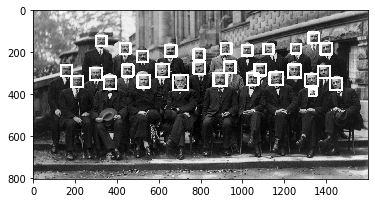

In [26]:
result = adj_detect_face(solvary)
plt.imshow(result,cmap='gray')

In [27]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [28]:
def detect_eye(img):
    
    eye_img = img.copy()
    
    eye_rects = eye_cascade.detectMultiScale(eye_img, scaleFactor = 1.15, minNeighbors=3)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(eye_img, (x,y),(x+w, y+h),(255,255,255),10)
        
    return eye_img

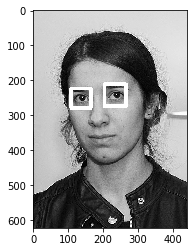

In [29]:
result = detect_eye(nadia)
plt.imshow(result,cmap='gray')

In [30]:
cap = cv2.VideoCapture(0)

while True:
    
    ret,frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Face Detect',frame)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()